<a href="https://colab.research.google.com/github/SaraaMaher/Binary-classifiaction-MRI/blob/main/CNN_Binary_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install tflearn

     |████████████████████████████████| 107 kB 14.6 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=7fd4359d4b10f14830115d5c354cde2ea0ffb43a420c68cda53cf553e51cbca2
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [ ]:
import cv2
import numpy as np
import glob
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras import datasets, layers, models
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from google.colab.patches import cv2_imshow
from tensorflow.keras.layers import Dense, BatchNormalization
from skimage.io import imread_collection
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow import keras

from tensorflow.keras import optimizers
optimizers.RMSprop
optimizers.Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
!unzip /content/drive/MyDrive/BinaryModelnoaug.zip

In [ ]:
path = "/content/drive/MyDrive/BinaryModelFull"
IMG_SIZE=224


In [ ]:
def load_images_from_folder(path,l,Data,label):
    for filename in os.listdir(path):
        img = cv2.imread(os.path.join(path,filename))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_LINEAR)
        img = img.reshape(img.shape+(1,)) 
        #img = img.astype(np.uint8)
        cv2.waitKey(0)
        # Blur the image for better edge detection
        img_blur = cv2.GaussianBlur(img, (3,3), 0)

       # Canny Edge Detection
        edges = cv2.Canny(image=img_blur, threshold1=30, threshold2=150) # Canny Edge Detection
       # Display Canny Edge Detection Image
        #cv2_imshow( edges)
        cv2.waitKey(0)
        cv2.waitKey(0)

        pts = np.argwhere(edges>0)
        y1,x1 = pts.min(axis=0)
        y2,x2 = pts.max(axis=0)

        ## crop the region
        cropped = img[y1:y2, x1:x2]
        cv2.imwrite("cropped.png", cropped)

        tagged = cv2.rectangle(img.copy(), (x1,y1), (x2,y2), (0,255,0), 3, cv2.LINE_AA)
        #cv2_imshow( tagged)
        cv2.waitKey()
        cv2.destroyAllWindows()
        if tagged is not None:
            Data.append(tagged)
            l = l.astype(np.uint8)
            label.append(l)

In [ ]:
def load_data(path2):
  fullpath=path+path2
  Data=[]
  label=[]
  load_images_from_folder(fullpath+"/yes",np.array([0]),Data,label)
  load_images_from_folder(fullpath+"/no",np.array([1]),Data,label)
  Data=np.array(Data)
  label=np.array(label)
  return Data,label

In [ ]:
Train_Data,Train_Label=load_data("/Training")
Test_Data,Test_Label=load_data("/Testing")
Validation_Data,validation_Label=load_data("/Validation")

In [ ]:
Test_Label = keras.utils.to_categorical(Test_Label, 2)
Train_Label = keras.utils.to_categorical(Train_Label, 2)


In [ ]:

Val_Label = keras.utils.to_categorical(validation_Label, 2)

In [ ]:
print(Train_Label.shape)

(9751, 2)


In [ ]:

import keras.backend as K
K.clear_session()

model = models.Sequential()
model.add(layers.Conv2D(16,(3,3), activation='relu',   input_shape=(224,224,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2) ))


model.add(layers.Conv2D(32, (3,3),activation ='relu'))
model.add(layers.Conv2D(32, (3,3),activation ='relu' ))

model.add(layers.MaxPooling2D(pool_size = (2, 2) ))

model.add(layers.Conv2D(64, (3,3),activation ='relu' ))
model.add(layers.Conv2D(64, (3,3),activation ='relu' ))
model.add(layers.Conv2D(64, (3,3),activation ='relu' ))

model.add(layers.MaxPooling2D(pool_size = (2, 2) ))

model.add(layers.Conv2D(128, (3,3),activation ='relu' ))
model.add(layers.Conv2D(128, (3,3),activation ='relu' ))


model.add(layers.MaxPooling2D(pool_size = (2, 2) ))


model.add(layers.Flatten())
model.add(layers.Dense(256))


model.add(tf.keras.layers.Dense(2, activation = "softmax"))  

opt = keras.optimizers.Adam(learning_rate=0.0001)


model.compile(optimizer=opt ,loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'] )


history = model.fit(Train_Data,Train_Label,epochs=50,validation_data=(Validation_Data, Val_Label))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Train on 9751 samples, validate on 745 samples
Epoch 1/50
9751/9751 [==============================] - ETA: 0s - loss: 0.7625 - acc: 0.7220

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


9751/9751 [==============================] - 15s 2ms/sample - loss: 0.7625 - acc: 0.7220 - val_loss: 0.3805 - val_acc: 0.8215
Epoch 2/50
9751/9751 [==============================] - 15s 2ms/sample - loss: 0.3912 - acc: 0.8169 - val_loss: 0.3076 - val_acc: 0.8604
Epoch 3/50
9751/9751 [==============================] - 16s 2ms/sample - loss: 0.3215 - acc: 0.8603 - val_loss: 0.4001 - val_acc: 0.8322
Epoch 4/50
9751/9751 [==============================] - 16s 2ms/sample - loss: 0.2375 - acc: 0.8980 - val_loss: 0.2100 - val_acc: 0.9114
Epoch 5/50
9751/9751 [==============================] - 15s 2ms/sample - loss: 0.1731 - acc: 0.9324 - val_loss: 0.1974 - val_acc: 0.9101
Epoch 6/50
9751/9751 [==============================] - 15s 2ms/sample - loss: 0.1381 - acc: 0.9453 - val_loss: 0.1836 - val_acc: 0.9208
Epoch 7/50
9751/9751 [==============================] - 15s 2ms/sample - loss: 0.0950 - acc: 0.9639 - val_loss: 0.2029 - val_acc: 0.9262
Epoch 8/50
9751/9751 [==============================

0.9510574


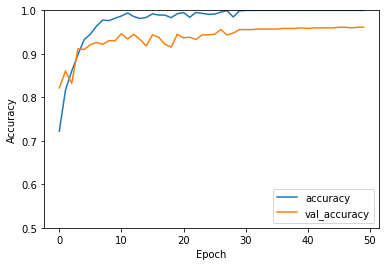

In [ ]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(Test_Data,Test_Label, verbose=2)
print(test_acc)

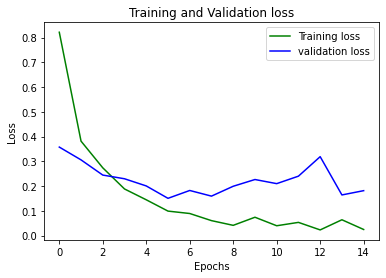

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,35)
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_predict=model.predict(Test_Data)
classes_x=np.argmax(y_predict,axis=1)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
matrix = metrics.confusion_matrix(Test_Label,classes_x )
print(matrix)
matrix=np.flip(matrix) 
acc = (matrix[0][0] + matrix[-1][-1]) / np.sum(matrix)
prec=(matrix[0][0]/(matrix[0][0]+matrix[1][0]))
recall=(matrix[0][0]/(matrix[0][0]+matrix[0][1]))
sp=(matrix[1][1]/(matrix[1][1]+matrix[1][0]))
print(acc)
print(prec)
print(recall)
print(sp)